# Utilizando K-means com a base da iris

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from K_means_class import KMeans as km
import K_means as KmeansGPT
from sklearn import datasets

In [69]:
iris = pd.read_csv('iris.csv')
K = 3

In [70]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [71]:
target_name = iris['variety'].unique()

In [72]:
target = np.array(iris['variety'].map({'Setosa': 0, 'Versicolor': 1,'Virginica': 2}))

In [73]:
df = iris.drop(columns=['variety'])

In [74]:
df_to_x = df[['sepal.length','sepal.width','petal.length']]

In [75]:
x = np.array(df_to_x)

In [76]:
x

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

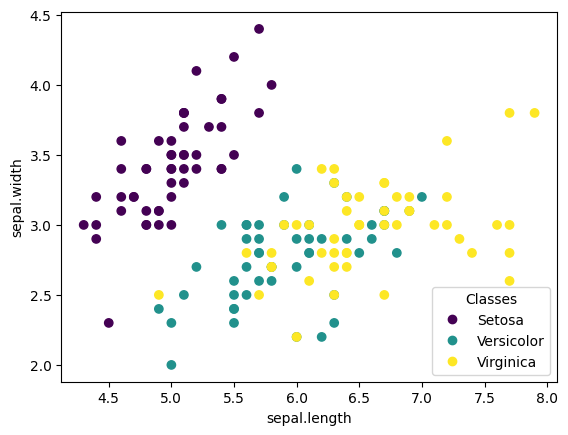

In [77]:
_, ax = plt.subplots()
scatter = ax.scatter(x[:, 0], x[:, 1], c=target)
ax.set(xlabel=df.columns[0], ylabel=df.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0], target_name, loc="lower right", title="Classes"
)

## Iniciando o K-means normal

In [78]:
modelX = km(max_iter = 100, tolerance = 0.5, clusters = K,distance_metric='euclidean')
(clustersX, data_with_clustersX) = modelX.fit(x)

In [79]:
data_with_clustersX

array([[5.1, 3.5, 1.4, 0. ],
       [4.9, 3. , 1.4, 0. ],
       [4.7, 3.2, 1.3, 0. ],
       [4.6, 3.1, 1.5, 0. ],
       [5. , 3.6, 1.4, 0. ],
       [5.4, 3.9, 1.7, 0. ],
       [4.6, 3.4, 1.4, 0. ],
       [5. , 3.4, 1.5, 0. ],
       [4.4, 2.9, 1.4, 0. ],
       [4.9, 3.1, 1.5, 0. ],
       [5.4, 3.7, 1.5, 0. ],
       [4.8, 3.4, 1.6, 0. ],
       [4.8, 3. , 1.4, 0. ],
       [4.3, 3. , 1.1, 0. ],
       [5.8, 4. , 1.2, 0. ],
       [5.7, 4.4, 1.5, 0. ],
       [5.4, 3.9, 1.3, 0. ],
       [5.1, 3.5, 1.4, 0. ],
       [5.7, 3.8, 1.7, 0. ],
       [5.1, 3.8, 1.5, 0. ],
       [5.4, 3.4, 1.7, 0. ],
       [5.1, 3.7, 1.5, 0. ],
       [4.6, 3.6, 1. , 0. ],
       [5.1, 3.3, 1.7, 0. ],
       [4.8, 3.4, 1.9, 0. ],
       [5. , 3. , 1.6, 0. ],
       [5. , 3.4, 1.6, 0. ],
       [5.2, 3.5, 1.5, 0. ],
       [5.2, 3.4, 1.4, 0. ],
       [4.7, 3.2, 1.6, 0. ],
       [4.8, 3.1, 1.6, 0. ],
       [5.4, 3.4, 1.5, 0. ],
       [5.2, 4.1, 1.5, 0. ],
       [5.5, 4.2, 1.4, 0. ],
       [4.9, 3

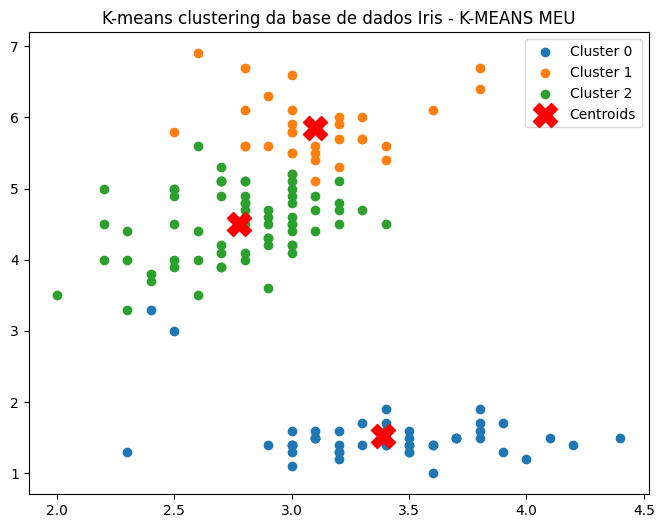

In [83]:
x_index = 1  # Comprimento da pétala
y_index = 2  # Largura da pétala

plt.figure(figsize=(8, 6))

xxx = np.unique(data_with_clustersX[:,3])

# Criar um scatter plot com as cores dos clusters
for cluster in range(len(xxx)):
    plt.scatter(x[data_with_clustersX[:,3] == cluster, x_index], 
                x[data_with_clustersX[:,3] == cluster, y_index], 
                label=f'Cluster {cluster}')

# Plotar os centroids
plt.scatter(clustersX[:, x_index], 
            clustersX[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Adicionar título e legendas
plt.title('K-means clustering da base de dados Iris - K-MEANS MEU')
plt.legend()

# Mostrar o gráfico
plt.show()

## Iniciando o K-means do Chat GPT

In [84]:
xx = KmeansGPT.k_means(x,K,max_iter=100)
centroids, labels = xx

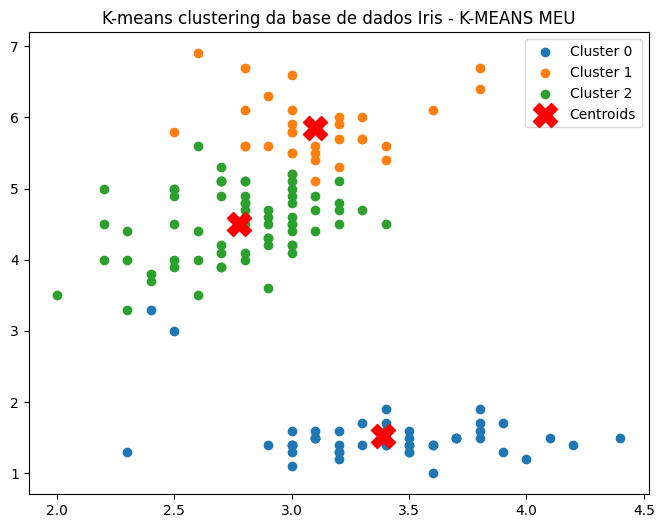

In [86]:
x_index = 1 # Comprimento da pétala
y_index = 2  # Largura da pétala

plt.figure(figsize=(8, 6))

xxx = np.unique(data_with_clustersX[:,3])

# Criar um scatter plot com as cores dos clusters
for cluster in range(len(xxx)):
    plt.scatter(x[data_with_clustersX[:,3] == cluster, x_index], 
                x[data_with_clustersX[:,3] == cluster, y_index], 
                label=f'Cluster {cluster}')

# Plotar os centroids
plt.scatter(clustersX[:, x_index], 
            clustersX[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Adicionar título e legendas
plt.title('K-means clustering da base de dados Iris - K-MEANS MEU')
plt.legend()

# Mostrar o gráfico
plt.show()

## Em comparação 

Os dados ficaram identicos não teve muita divergencia 